# Regresion Logistica Implementacion
### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math , Latex

In [2]:
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
data = pd.read_csv('../Machine Learning/python-ml-course/datasets/bank/bank.csv',sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.shape

(4119, 21)

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
data['y'] = pd.get_dummies(data['y'],drop_first=True)

In [9]:
data['y'].sum()

451

In [10]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [11]:
data['education'] = np.where(data['education'] == "basic.9y", "Basic",data['education'])
data['education'] = np.where(data['education'] == "basic.6y", "Basic",data['education'])
data['education'] = np.where(data['education'] == "basic.4y", "Basic",data['education'])

data['education'] = np.where(data['education'] == "high.school", "High school",data['education'])
data['education'] = np.where(data['education'] == "university.degree", "University",data['education'])
data['education'] = np.where(data['education'] == "professional.course", "Professional Course",data['education'])
data['education'] = np.where(data['education'] == "illiterate", "Illiterate",data['education'])
data['education'] = np.where(data['education'] == "unknown", "Unknown",data['education'])


In [12]:
data['education'].unique()

array(['Basic', 'High school', 'University', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [13]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


### Analisis de los datos

In [14]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'cantidad de compras')

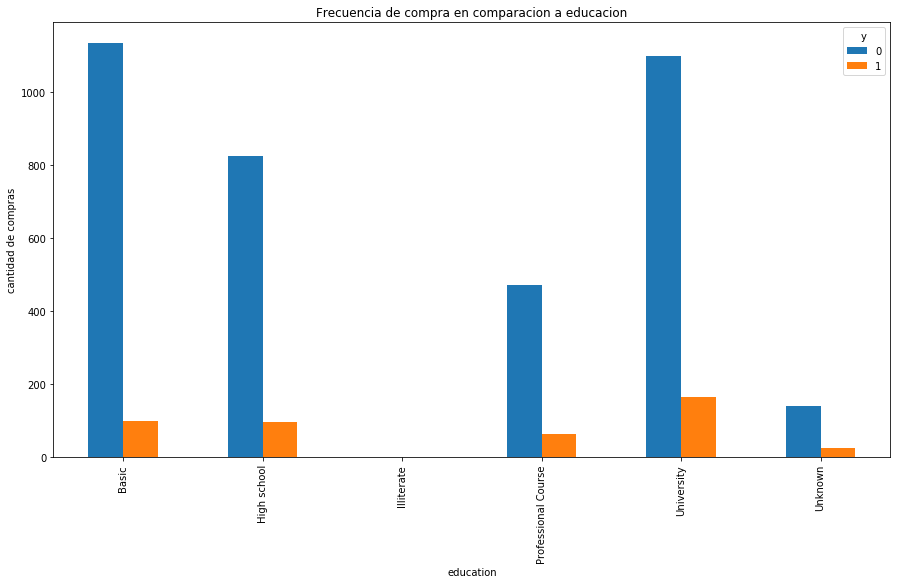

In [15]:
pd.crosstab(data['education'],data['y']).plot(kind="bar")
plt.title('Frecuencia de compra en comparacion a educacion')
plt.ylabel('cantidad de compras')

In [16]:
tabla = pd.crosstab(data['marital'],data['y'])
figure , axs = plt.subplots(2,1,sharey=False)
tabla.div(tabla.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True , ax=axs[0])
plt.title('Estado civico contra cantidad nivel de compra')
plt.xlabel('Estado civil')
plt.ylabel('probabilidad de compra')

tabla.plot(kind='bar', stacked=True,ax=axs[1])
plt.title('Estado civico contra cantidad nivel de compra')
plt.xlabel('Estado civil')
plt.ylabel('probabilidad de compra')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4EAAAJICAYAAADfOuEEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdedxt53w3/s83kxgyJxQnnCCoWRqKqlIeISpBUVqExKODPmKoNo/yiNJW+ytK20erpqipqNYcVTVU1RCzBk/SUDlJyCQRQ5Dk+/tjrzvZuXPf5+zknH32fZ/1fr9e+7X3utbaa3/3cJ+zP/u61rWquwMAAMA47LToAgAAANh+hEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAXYAVXWTqvpeVe28Dfa1saq6qnbZFrUxHlX1rKp65aLruDqq6vFV9bEFPv5/VtW9F/X4wDj5Dx4Ylar6RpIbJLl0qvmW3X3mYiraNrr7m0mut+g6GLfu/qNF17DedPdtF10DMD56AoExenB3X2/qcpUAqBdsx+G9vHq8XgA7PiEQIFcaAnlMVX0zyb8O7Xerqo9X1QVV9YXpYVtVtW9Vvaaqzqyq71TVPw3tVxleNuz7FsPta1XVn1XVN6vq21X111V17WHdvatqU1U9o6rOrqqzquoJU/u5dlW9qKr+u6ourKqPDW1XGsJZVU+oqq9U1UVVdVpV/fpmnvvOQz3nVtVpSR60bP1eVfWqoZYzquoFqw07Hfb1rKr6r+GxP1NVBw7r7lFVnx7q/nRV3WPqfh8e9vvxYVjru6pqv6p6Q1V9d9h+47LX8ynDczu3qv6/qtpp6vX/96p6SVWdn+T4qrp5Vf1rVZ03bP+Gqtp7M6/JravqA1V1flV9raoeObXutVX1V1X1nuE5frKqbr6Zfd1z6jN0elU9fup1fV1VnTO8n89e5TlcMDzPewztpw+fjaOW1fTXQ80XVdVHquqmU+tfOtzvu8N78vNT646vqrdV1eur6rtJHl9Vd62q/xge+6yq+suq2m3qPreden2+XVXPmtrX66e2O6Imwx0vGN7jn55a942q+p2q+uLwmfj7qtp9lddwW75/+1XVO4fX4lNJbj617ipDoYe6nzi1/D/rir+tk6vqkKH9uLric39yVT10WU2r3e8bVXW/4fa1qurPa/JvypnD7WsN6zb7bwPA1SEEAlzZLyT56SSHVdWNk7wnyQuS7Jvkd5L8Q1UdMGz7d0muk+S2Sa6f5CUzPsafJLllkjsluUWSGyf5P1PrfyrJXkP7MUn+qqr2Gdb9WZKfSXKPoabfTXLZCo9xdpJfSrJnkickecnSl84V/M9h2zsnOTTJw5etPyHJJUOtd05y/yRPzMqenuTRSQ4fHvvoJD+oqn0zeS1flmS/JC9O8p6q2m/qvo9K8tjhed88yX8kec3wPL+S5LnLHuuhQ72HJDlyeKwlP5vktEzelz9MUkn+OMmNMnl/D0xy/EpPoKqum+QDSd443P/RSf5vVU0P23t0kucl2SfJqcNjrLSvmyR5X5K/SHJAJu/554fVf5HJ+3yzTD53j8vkvZp+Dl/M5PV6Y5I3J7lLJu/DY5L8ZVVNDwH+tSTPT7L/8BhvmFr36eGx9x329dZlgevIJG9Lsvdwv0uTPG3Y192T3DfJbw3PaY8k/5LkxExez1sk+eAKz/2WSd6U5KnDc39vkndNh8kkj0zygCQHJblDkscv38/S7rLt3r+/SnJxkhtm8pk5eqX9rLLvRwyP+7hMPt9HJDlvWP1fSX4+k/f0eUleX1U3nOF+034/yd0yea/umOSuSZ49tX5z/zYAzK67XVxcXEZzSfKNJN9LcsFw+aehfWOSTnKzqW1/L8nfLbv/+5MclckXyMuS7LPCYzw+yceWtXUmX5YryfeT3Hxq3d2TfH24fe8kP0yyy9T6szP5YrjTsO6OKzzmUv27rPK8/ynJsaus+9ckvzG1fP+lfWVy/OSPklx7av2jk3xolX19LcmRK7Q/NsmnlrX9R5LHD7c/nOT3p9a9KMn7ppYfnOTzy17PB0wt/1aSD069/t/cwufgIUk+t8q6X0nyb8va/ibJc4fbr03yyql1hyf56ir7+t9J/nGF9p2H1/U2U22/nuTDU8/hlKl1tx+e8w2m2s5Lcqepmt48te56mQS5A1ep6ztLn6NMwslHt/B6PXXpeQzv/2qv3fFJXj/cfk6St0yt2ynJGUnuPfW3+Jip9X+a5K83V8fWvn/D6/6TJLeeWvdHGf5es8Lf0fDZfOJw+/1Z5e9ohTo+n+FvYXP3G16H+w23/yvJ4VPrDkvyjeH2vbPKvw2z1OPi4uIyfTHuHxijh3T3v6yy7vSp2zdN8oiqevBU265JPpRJT8T53f2dq/nYB2TSe/iZqlpqq0y+nC45r7svmVr+QSZf6vdPsnsmXxQ3q6oemMmX3ltm8uX7Okm+tMrmN8qVn/d/T92+aSbP+aypendatv20A1ep70bL9rv0ODeeWv721O0frrC8fOKb5TXfaJV1qarrZ9IL+fNJ9sjkOaz23t00yc9W1QVTbbtk0vO75FtTt5fen5Ws9nrsn2S3XPk12dLrke7e3Gty+XPu7u/VZCjsjZKcXlXPyKT39kaZhJw9hxquct/k8l68F2fS03qdTJ7/Z7bwnJa70nve3ZdV1enLnuPy13H6PZyuZ1u9fwcMt1f7vG/Jqs+9qh6XSU/4xqFp6W92s/dbZvnfyfLP9Wr/NgBcLYaDAlxZT90+PZOewL2nLtft7hcO6/Zd5bik72fyxTlJUlU/NbXu3Ey+vN92ap97dfcsX+TOzWQY26rHnw2Pd60k/5DJ0NEbdPfemQzFq1XuclYmX1KX3GTq9umZ9FjtP1Xvnr36jIanr1LfmZl8OZ92k0x6hq6p5TVPT/DTy7b946HtDt29ZybDKVd7PU5P8pFl7/v1uvs3r0GNq70e52bSIzX9mmyz12MYJrpvkjOH4/9+L5Ohl/sMn4cLc+Xnv/z1enmSryY5eHi9njW1/WrPabkrvec1+RXhwFyz57it3r9zMhnavNrn/fvD9XWm2qb/fld87sPxl3+b5LeT7De8xl/OVr5muernGmCbEAIBVvf6JA+uqsNqMuHJ7sPkDBu6+6xMjvX6v1W1T1XtWlX3Gu73hSS3rao7DcddHb+0w+6+LJMviy8ZejdSVTeuqsO2VMxw31cneXFV3Wio6e5LE0dM2S3JtTJ84R16Be+/mV2/JclTqmrDcHzRcVOPeVaSf07yoqras6p2Gibp+IVV9vXKJM+vqoNr4g7DcX/vTXLLqvrVqtqlqn4lyW2SvHtLz3sznjm89gcmOTbJ329m2z0yDAMejvV85ma2ffdQ62OH93XXqrpLTU1qcjW8Icn9quqRw/Per6ru1N2XZvK6/2FV7TGEiKdn8pm7pg6vySQ0u2VybOAnu/v0TJ77JZl8Hnapqv+TSU/g5uyR5LtJvldVt04yHYDfneSnquqpw0Qme1TVz66wj7ckeVBV3beqdk3yjEx+UPj4NXhu2+T9G173t2cyWdB1quo2mQzvTpJ09zmZhNTHDH9fR+fK4e2VSX6nqn5m+HzfYnjvrptJSD0nmUzMlOR2M9xvuTcleXZVHVBV+2dyrPDWfCYAViQEAqxi+AJ9ZCa9IOdk8mv+M3PFv52PzaQ356uZHJvz1OF+/y/JH2QyecYpSZafiPr3MplM5BM1mY3xX5LcasayfieTYZ2fTnJ+JpPMXOnf8u6+KMlTMvkS/p0kv5rknZvZ599mcszSF5J8NpMvydMel0mwPHnY39syOSZyJS8eHvefMwkRr8rkeMLzMpl85hmZHMv2u0l+qbvP3dIT3ox3ZDJE8fOZTDrzqs1s+7xMJpC5cNh2+XO83PD63T+TiWrOzGTI4p9kEqyvlp6cv/HwTJ73+UOtdxxW/69Mep5Oy+Qz8sZMQv419cZMhgCfn8nkQb82tL8/kx8s/l8mwwsvzurDeZf8Tiafm4sy+XxcHrCH1+d/ZHKc5rcy+YzfZ/kOuvtrmfTY/UUmPZ8PzuT0LD++Bs9tW75/v53JEMpvZXIs5WuW7eJ/ZvJ3fl4mkz5dHlq7+62ZTAL0xkxem39Ksm93n5zJcaz/kckw3tsn+fct3W+F8l+Q5KRMJgT6UiZ/jy9Y7bkCXFPVvXwECACsbVXVmQxVPHXRtawFVfXaJJu6+9lb2hYA9AQCAACMiBAIAAAwIoaDAgAAjIieQAAAgBHZIU8Wv//++/fGjRsXXQYAAMBCfOYznzm3uw9Yad0OGQI3btyYk046adFlAAAALERV/fdq6wwHBQAAGBEhEAAAYESEQAAAgBHZIY8JBAAA2Fo/+clPsmnTplx88cWLLmVVu+++ezZs2JBdd9115vsIgQAAACvYtGlT9thjj2zcuDFVtehyrqK7c95552XTpk056KCDZr6f4aAAAAAruPjii7PffvutyQCYJFWV/fbb72r3VAqBAAAAq1irAXDJNalPCAQAABgRIRAAAGBEhEAAAIAREQIBAADm6DnPeU5e+tKXXr78+7//+3nZy162sHqEQAAAgDk65phjcsIJJyRJLrvssrz5zW/Or/3ary2sHucJBAAAmKONGzdmv/32y+c+97l8+9vfzp3vfOfst99+C6tHCAQAAJizJz7xiXnta1+bb33rWzn66KMXWovhoAAAAHP20Ic+NCeeeGI+/elP57DDDltoLXoCAQAA5my33XbLfe5zn+y9997ZeeedF1qLEAgAADBnl112WT7xiU/krW9966JLMRwUAABgnk4++eTc4ha3yH3ve98cfPDBiy5HTyAAAMA83eY2t8lpp5226DIuJwTO2cbj3rPoEi73jRc+aNElAAAAC2Y4KAAAwIgIgQAAACMiBAIAAIyIYwIBAABmsK3n+5h1zo4TTzwxxx57bC699NI88YlPzHHHHbdVj6snEAAAYI269NJL8+QnPznve9/7cvLJJ+dNb3pTTj755K3apxAIAACwRn3qU5/KLW5xi9zsZjfLbrvtlkc96lF5xzvesVX7FAIBAADWqDPOOCMHHnjg5csbNmzIGWecsVX7FAIBAADWqO6+SltVbdU+hUAAAIA1asOGDTn99NMvX960aVNudKMbbdU+hUAAAIA16i53uUtOOeWUfP3rX8+Pf/zjvPnNb84RRxyxVft0iggAAIAZzHpKh21pl112yV/+5V/msMMOy6WXXpqjjz46t73tbbdun9uoNgAAAObg8MMPz+GHH77N9icEAgCQZNufCHtrLKLHBcbCMYEAAAAjIgQCAACMiBAIAAAwIkIgAADAiAiBAAAAI2J2UAAAgFkcv9c23t+FW9zk6KOPzrvf/e5c//rXz5e//OVt8rB6AgEAANaoxz/+8TnxxBO36T6FQAAAgDXqXve6V/bdd99tuk8hEAAAYESEQAAAgBERAgEAAEZECAQAABgRp4gAAACYxQyndNjWHv3oR+fDH/5wzj333GzYsCHPe97zcswxx2zVPoVAAACANepNb3rTNt+n4aAAAAAjIgQCAACMiBAIAACwiu5edAmbdU3qEwIBAABWsPvuu+e8885bs0Gwu3Peeedl9913v1r3MzEMAADACjZs2JBNmzblnHPOWXQpq9p9992zYcOGq3UfIRAAAGAFu+66aw466KBFl7HNGQ4KAAAwIkIgAADAiAiBAAAAIyIEAgAAjIgQCAAAMCJCIAAAwIgIgQAAACMiBAIAAIyIEAgAADAiQiAAAMCICIEAAAAjIgQCAACMyNxCYFW9uqrOrqovT7XtW1UfqKpThut9hvaqqpdV1alV9cWqOmTqPkcN259SVUfNq14AAIAxmGdP4GuTPGBZ23FJPtjdByf54LCcJA9McvBweVKSlyeT0JjkuUl+Nsldkzx3KTgCAABw9c0tBHb3R5Ocv6z5yCQnDLdPSPKQqfbX9cQnkuxdVTdMcliSD3T3+d39nSQfyFWDJQAAADPa3scE3qC7z0qS4fr6Q/uNk5w+td2moW219quoqidV1UlVddI555yzzQsHAADYEayViWFqhbbeTPtVG7tf0d2HdvehBxxwwDYtDgAAYEexvUPgt4dhnhmuzx7aNyU5cGq7DUnO3Ew7AAAA18D2DoHvTLI0w+dRSd4x1f64YZbQuyW5cBgu+v4k96+qfYYJYe4/tAEAAHAN7DKvHVfVm5LcO8n+VbUpk1k+X5jkLVV1TJJvJnnEsPl7kxye5NQkP0jyhCTp7vOr6vlJPj1s9wfdvXyyGQAAAGY0txDY3Y9eZdV9V9i2kzx5lf28Osmrt2FpAAAAo7VWJoYBAABgOxACAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGZJdFFwBcYeNx71l0CZf7xgsftOgSAACYAz2BAAAAIyIEAgAAjIgQCAAAMCJCIAAAwIgIgQAAACOykBBYVU+rqv+sqi9X1ZuqaveqOqiqPllVp1TV31fVbsO21xqWTx3Wb1xEzQAAADuC7R4Cq+rGSZ6S5NDuvl2SnZM8KsmfJHlJdx+c5DtJjhnuckyS73T3LZK8ZNgOAACAa2BRw0F3SXLtqtolyXWSnJXkF5O8bVh/QpKHDLePHJYzrL9vVdV2rBUAAGCHsd1DYHefkeTPknwzk/B3YZLPJLmguy8ZNtuU5MbD7RsnOX247yXD9vst329VPamqTqqqk84555z5PgkAAIB1ahHDQffJpHfvoCQ3SnLdJA9cYdNeustm1l3R0P2K7j60uw894IADtlW5AAAAO5RFDAe9X5Kvd/c53f2TJG9Pco8kew/DQ5NkQ5Izh9ubkhyYJMP6vZKcv31LBgAA2DEsIgR+M8ndquo6w7F9901ycpIPJXn4sM1RSd4x3H7nsJxh/b9291V6AgEAANiyRRwT+MlMJnj5bJIvDTW8IsnvJXl6VZ2ayTF/rxru8qok+w3tT09y3PauGQAAYEexy5Y32fa6+7lJnrus+bQkd11h24uTPGJ71AUAALCjW9QpIgAAAFgAIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRLYYAqvqEVW1x3D72VX19qo6ZP6lAQAAsK3N0hP4nO6+qKrumeSwJCckefl8ywIAAGAeZgmBlw7XD0ry8u5+R5Ld5lcSAAAA8zJLCDyjqv4mySOTvLeqrjXj/QAAAFhjZglzj0zy/iQP6O4Lkuyb5JlzrQoAAIC52GII7O4fdPfbk1xYVTdJsmuSr869MgAAALa5WWYHPaKqTkny9SQfGa7fN+/CAAAA2PZmGQ76/CR3S/L/uvugJPdL8u9zrQoAAIC5mCUE/qS7z0uyU1Xt1N0fSnKnOdcFAADAHOwywzYXVNX1knw0yRuq6uwkl8y3LAAAAOZhlp7AI5P8IMnTkpyY5L+SPHieRQEAADAfm+0JrKqdk7yju++X5LIkJ2yXqgAAAJiLzfYEdvelSX5QVXttp3oAAACYo1mOCbw4yZeq6gNJvr/U2N1PmVtVAAAAzMUsIfA9wwUAAIB1boshsLtPqKrdktw6SSf5Wnf/eO6VAQAAsM1tMQRW1eFJ/iaTWUEryUFV9evd/b55FwcAAMC2Nctw0BcnuU93n5okVXXzTIaHCoEAAADrzCznCTx7KQAOTkty9pzqAQAAYI5m6Qn8z6p6b5K3ZHJM4COSfLqqHpYk3f32OdYHAADANjRLCNw9ybeT/MKwfE6SfZM8OJNQKAQCAACsE7PMDvqE7VEIAAAA8zfL7KAHJflfSTZOb9/dR8yvLAAAAOZhluGg/5TkVUneleSy+ZYDAADAPM0SAi/u7pfNvRIAAADmbpYQ+NKqem6Sf07yo6XG7v7s3KoCAABgLmYJgbdP8tgkv5grhoP2sAwAAMA6MksIfGiSm3X3j+ddDAAAAPO10wzbfCHJ3vMuBAAAgPmbpSfwBkm+WlWfzpWPCXSKCAAAgHVmlhD43LlXAQAAwHaxxRDY3R+pqhskucvQ9KnuPnu+ZQEAADAPWzwmsKoemeRTSR6R5JFJPllVD593YQAAAGx7swwH/f0kd1nq/auqA5L8S5K3zbMwAAAAtr1ZZgfdadnwz/NmvB8AAABrzCw9gSdW1fuTvGlY/pUk75tfSQAAAMzLLBPDPLOqHpbknkkqySu6+x/nXhkAAADb3BZDYFUdlOS93f32YfnaVbWxu78x7+IAAADYtmY5tu+tSS6bWr50aAMAAGCdmSUE7tLdP15aGG7vNr+SAAAAmJdZQuA5VXXE0kJVHZnk3PmVBAAAwLzMMjvobyR5Q1X95bC8Kclj51cSAAAA8zLL7KD/leRuVXW9JNXdF82/LAAAAOZhlp7AJEl3f2+ehQAAADB/sxwTCAAAwA5CCAQAABiRLYbAqrpOVT2nqv52WD64qn5pax60qvauqrdV1Ver6itVdfeq2reqPlBVpwzX+wzbVlW9rKpOraovVtUhW/PYAAAAYzZLT+Brkvwoyd2H5U1JXrCVj/vSJCd2962T3DHJV5Icl+SD3X1wkg8Oy0nywCQHD5cnJXn5Vj42AADAaM0SAm/e3X+a5CdJ0t0/TFLX9AGras8k90ryqmF/P+7uC5IcmeSEYbMTkjxkuH1kktf1xCeS7F1VN7ymjw8AADBms4TAH1fVtZN0klTVzTPpGbymbpbknCSvqarPVdUrq+q6SW7Q3WclyXB9/WH7Gyc5fer+m4a2K6mqJ1XVSVV10jnnnLMV5QEAAOy4ZgmBz01yYpIDq+oNmQzV/N2teMxdkhyS5OXdfeck388VQz9XslKvY1+lofsV3X1odx96wAEHbEV5AAAAO65ZThb/gar6bJK7ZRLIju3uc7fiMTcl2dTdnxyW35ZJCPx2Vd2wu88ahnuePbX9gVP335DkzK14fAAAgNFatSewqg5ZuiS5aZKzMglfN9maGTq7+1tJTq+qWw1N901ycpJ3JjlqaDsqyTuG2+9M8rhhltC7JblwadgoAAAAV8/megJfNFzvnuTQJF/IpCfwDkk+meSeW/G4/yvJG6pqtySnJXlCJoH0LVV1TJJvJnnEsO17kxye5NQkPxi2BQAA4BpYNQR2932SpKrenORJ3f2lYfl2SX5nax60uz+fSbBc7r4rbNtJnrw1jwcAAMDELBPD3HopACZJd385yZ3mVxIAAADzssWJYZJ8papemeT1mczK+ZhMTu4OAADAOjNLCHxCkt9Mcuyw/NEkL59bRQAAAMzNLKeIuDjJS4YLAAAA69gsxwQCAACwgxACAQAARkQIBAAAGJFVjwmsqndlMhvoirr7iLlUBAAAwNxsbmKYPxuuH5bkpzI5RUSSPDrJN+ZYEwAAAHOyagjs7o8kSVU9v7vvNbXqXVX10blXBgAAwDY3yzGBB1TVzZYWquqgJAfMryQAAADmZZaTxT8tyYer6rRheWOSX59bRQAAAMzNLCeLP7GqDk5y66Hpq939o/mWBQAAwDzM0hOYJAcnuVWS3ZPcsarS3a+bX1kAAADMwxZDYFU9N8m9k9wmyXuTPDDJx5IIgQAAAOvMLBPDPDzJfZN8q7ufkOSOSa4116oAAACYi1lC4A+7+7Ikl1TVnknOTnKzLdwHAACANWiWYwJPqqq9k/xtks8k+V6ST821KgAAAOZiltlBf2u4+ddVdWKSPbv7i/MtCwAAgHlYNQRW1SGbW9fdn51PSQAAAMzL5noCXzRc757k0CRfSFJJ7pDkk0nuOd/SAAAA2NZWnRimu+/T3fdJ8t9JDunuQ7v7Z5LcOcmp26tAAAAAtp1ZZge9dXd/aWmhu7+c5E7zKwkAAIB5mWV20K9U1SuTvD5JJ3lMkq/MtSoAAADmYpYQ+IQkv5nk2GH5o0lePreKAAAAmJtZThFxcZKXDBcAAADWsc2dIuIt3f3IqvpSJsNAr6S77zDXygAAANjmNtcTuDT885e2RyEAAADM3+ZOEXHWcPO3uvu/py9Jfmv7lAcAAMC2NMspIv7HCm0P3NaFAAAAMH+bOybwNzPp8btZVX1xatUeSf593oUBAACw7W3umMA3Jnlfkj9OctxU+0Xdff5cqwIAAGAuVg2B3X1hkguTPLqqdk5yg2H761XV9br7m9upRgAAALaRLZ4nsKp+O8nxSb6d5LKhuZM4RQQAAMA6s8UQmOSpSW7V3efNuxgAAADma5bZQU/PZFgoAAAA69wsPYGnJflwVb0nyY+WGrv7xXOrCgAAgLmYJQR+c7jsNlwAAABYp7YYArv7edujEAAAAOZvltlBD0jyu0lum2T3pfbu/sU51gUAAMAczDIxzBuSfDXJQUmel+QbST49x5oAAACYk1mOCdyvu19VVcd290eSfKSqPjLvwgCAbWPjce9ZdAmX+8YLH7ToEgBGb5YQ+JPh+qyqelCSM5NsmF9JAAAAzMssIfAFVbVXkmck+YskeyZ52lyrAgAAYC5mmR303cPNC5PcZ77lAAAAME9bnBimqk6oqr2nlvepqlfPtywAAADmYZbZQe/Q3RcsLXT3d5LceX4lAQAAMC+zhMCdqmqfpYWq2jezHUsIAADAGjNLmHtRko9X1duSdFTvPv8AAB8ASURBVJJHJvnDuVYFAADAXMwyMczrquqkJL+YpJI8rLtPnntlAAAAbHMzDescQp/gBwAAsM7NckwgAAAAOwghEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGJGFhcCq2rmqPldV7x6WD6qqT1bVKVX191W129B+rWH51GH9xkXVDAAAsN4tsifw2CRfmVr+kyQv6e6Dk3wnyTFD+zFJvtPdt0jykmE7AAAAroGFhMCq2pDkQUleOSxXkl9M8rZhkxOSPGS4feSwnGH9fYftAQAAuJoW1RP450l+N8llw/J+SS7o7kuG5U1JbjzcvnGS05NkWH/hsP2VVNWTquqkqjrpnHPOmWftAAAA69Z2D4FV9UtJzu7uz0w3r7Bpz7DuiobuV3T3od196AEHHLANKgUAANjx7LKAx/y5JEdU1eFJdk+yZyY9g3tX1S5Db9+GJGcO229KcmCSTVW1S5K9kpy//csGAABY/7Z7T2B3/+/u3tDdG5M8Ksm/dvevJflQkocPmx2V5B3D7XcOyxnW/2t3X6UnEAAAgC1bS+cJ/L0kT6+qUzM55u9VQ/urkuw3tD89yXELqg8AAGDdW8Rw0Mt194eTfHi4fVqSu66wzcVJHrFdCwMAANhBraWeQAAAAOZMCAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAR2e4hsKoOrKoPVdVXquo/q+rYoX3fqvpAVZ0yXO8ztFdVvayqTq2qL1bVIdu7ZgAAgB3FInoCL0nyjO7+6SR3S/LkqrpNkuOSfLC7D07ywWE5SR6Y5ODh8qQkL9/+JQMAAOwYtnsI7O6zuvuzw+2LknwlyY2THJnkhGGzE5I8ZLh9ZJLX9cQnkuxdVTfczmUDAADsEBZ6TGBVbUxy5ySfTHKD7j4rmQTFJNcfNrtxktOn7rZpaFu+rydV1UlVddI555wzz7IBAADWrYWFwKq6XpJ/SPLU7v7u5jZdoa2v0tD9iu4+tLsPPeCAA7ZVmQAAADuUhYTAqto1kwD4hu5++9D87aVhnsP12UP7piQHTt19Q5Izt1etAAAAO5JFzA5aSV6V5Cvd/eKpVe9MctRw+6gk75hqf9wwS+jdkly4NGwUAACAq2eXBTzmzyV5bJIvVdXnh7ZnJXlhkrdU1TFJvpnkEcO69yY5PMmpSX6Q5Anbt1wAAIAdx3YPgd39sax8nF+S3HeF7TvJk+daFAAAwEgsdHZQAAAAti8hEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIARWcTJ4gEAYPOO32vRFVzh+AsXXQFsU3oCAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIARcbJ4AADgatt43HsWXcLlvvHCBy26hHVFTyAAAMCICIEAAAAjIgQCAACMiBAIAAAwIkIgAADAiAiBAAAAIyIEAgAAjIgQCAAAMCJCIAAAwIgIgQAAACMiBAIAAIyIEAgAADAiQiAAAMCICIEAAAAjssuiC2A7On6vRVdwheMvXHQFAAAwSkIgsLK18qOBHwwAALYpw0EBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEdll0AQDAiBy/16IrmDj+wkVXALAwegIBAABGRAgEAAAYESEQAABgRIRAAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBERAgEAAEZECAQAABgRIRAAAGBEhEAAAIAREQIBAABGZJdFFwAAALBVjt9r0RVMHH/hoiuYiZ5AAACAERECAQAARkQIBAAAGBEhEAAAYESEQAAAgBFZNyGwqh5QVV+rqlOr6rhF1wMAALAerYsQWFU7J/mrJA9Mcpskj66q2yy2KgAAgPVnXYTAJHdNcmp3n9bdP07y5iRHLrgmAACAdae6e9E1bFFVPTzJA7r7icPyY5P8bHf/9tQ2T0rypGHxVkm+tt0LXfv2T3Luootg3fB5YVY+K1wdPi/MymeFq8Pn5apu2t0HrLRil+1dyTVUK7RdKb129yuSvGL7lLM+VdVJ3X3ooutgffB5YVY+K1wdPi/MymeFq8Pn5epZL8NBNyU5cGp5Q5IzF1QLAADAurVeQuCnkxxcVQdV1W5JHpXknQuuCQAAYN1ZF8NBu/uSqvrtJO9PsnOSV3f3fy64rPXIcFmuDp8XZuWzwtXh88KsfFa4OnxeroZ1MTEMAAAA28Z6GQ4KAADANiAEAgAAjIgQCAAAMCLrYmIYYH6q6mGbW9/db99etQAAMH9CIPDgzazrJEIgK6qqaye5SXd/bdG1sHZV1S2TvDzJDbr7dlV1hyRHdPcLFlwaa1BV3a67v7zoOlj7qupaSX45ycZMZZru/oNF1bSemB10B1dVH0jyiO6+YFjeJ8mbu/uwxVYGrGdV9eAkf5Zkt+4+qKrulOQPuvuIBZfGGlNVH0nyzCR/0913Htq+3N23W2xlrEVV9bEkuyV5bZI3Ln1/geWq6sQkFyb5TJJLl9q7+0ULK2od0RO449t/+h/Q7v5OVV1/kQWxNlXVXkmem+ReQ9NHMvlSf+HiqmINOz7JXZN8OEm6+/NVtXFx5bCGXae7P1VV022XLKoY1rbuvmdVHZzk6CQnVdWnkrymuz+w4NJYezZ09wMWXcR6ZWKYHd9lVXWTpYWqumkmQ/xguVcnuSjJI4fLd5O8ZqEVsZZd4gcCZnRuVd08w/89VfXwJGcttiTWsu4+Jcmzk/xekl9I8rKq+uqWjmFndD5eVbdfdBHrlZ7AHd/vJ/nYMBwnmfTyPGmB9bB23by7f3lq+XlV9fmFVcNa9+Wq+tUkOw+/2j8lyccXXBNr05OTvCLJravqjCRfT/KYxZbEWjUcM/qEJA9K8oEkD+7uz1bVjZL8RxynzhXumeTxVfX1JD9KUkm6u++w2LLWB8cEjkBV7Z/kbpn8cfxHd5+74JJYg6rqP5I8s7s/Niz/XJI/6+67L7Yy1qKquk4mPzLdf2h6f5Lnd/ePFlcVa1lVXTfJTt190aJrYe2qqo8m+dskb+vuHy5b99ju/rvFVMZaM4xuu4ru/u/tXct6JATuoKrq1t391ao6ZKX13f3Z7V0Ta9swsccJSfbK5AeD85Mc1d1fXGhhrElV9YjufuuW2qCqjs1kaPlFmXy5PyTJcd39zwstjDWpqp7a3X++rO3Y7n7pompibaqqP0jyb0k+3t3fX3Q9640QuIOqqld095Oq6kMrrO7u/sXtXhTrQlXtmSTd/d1F18LaVVWf7e5DttQGVfWF7r5jVR2WydDQ52Qy0YfPClexyr8tn1uaWRaWVNXRmQwJvXsmPzL9W5KPdvc7FlrYOiEEAknMDspsquqBSQ7PZPKgv59atWeS23T3XRdSGGtWVX2xu+9QVS9N8uHu/kdf6lmuqh6d5Fcz+VL/b1Or9khyaXffbyGFseZV1U9l8n/S7yTZp7v3WHBJ64KJYXZwVfWIJCd290VV9exMhuE8v7s/t+DSWHteneTLmfxDmiSPzWQIl9nYmHZmkpOSHJHJuZmWXJTkaQupiLXuM1X1z0kOSvK/q2qPJJctuCbWno9nMmvs/kmmz/N2URKHJXAVVfXKJLdJ8u1Mfjh4eBKHO81IT+AObuoX2Hsm+eNMTu78rO7+2QWXxhpTVZ/v7jttqQ2SpKp27e6fLLoO1raanBxwQ5IDkpzW3RdU1X5Jbux4Y2BrVNU/JrlRkpMzGb300e4+bbFVrR/OE7jju3S4flCSlw/jpHdbYD2sXT8cfixIcvnsoD/czPaM28aqeltVnVxVpy1dFl0Ua0tPfmn+p+7+bHdfMLSdJwCyXFUtzUx9UVV9d+pyUVU5Rp2r6O6HDp0af5pk7yQfqqpNCy5r3TAcdMd3RlX9TZL7JfmTqrpWhH9W9htJXjccG7g0O+jjF1oRa9lrMjmG9CVJ7pPJeb1qoRWxVn2iqu7S3Z9edCGsXd19z+Ha8VzMpKp+KcnPZzKXwT5J/jVXPp6UzTAcdAc3nMvrAUm+1N2nVNUNk9ze1NysxuygzKKqPtPdP1NVX+ru2w9t/9bdP7/o2lhbqurkJLdM8t9Jvh8ndGYzqurmSTZ194+q6t5J7pDkdUs9ybCkqv4qyUeT/Ft3n7noetYbIXAkqur6SXZfWu7uby6wHNagoZf4l5NszNQoge7+g0XVxNpVVf+eyS+wb8vk19czkrywu2+10MJYc5zQmaujqj6f5NBM/i96f5J3JrlVdx++yLpYm6rqBknuMix+qrvPXmQ964lhgTu4qjqiqk5J8vVMDpr9epL3LbYq1qh3JDkyySWZ/Fq/dIGVPDXJdZI8JcnPJHlMkqMWWhFrVa9ygZVc1t2XJHlokj/v7qclueGCa2INGmbA/1SSR2Qys/knq+rhi61q/XBM4I7v+UnuluRfuvvOVXWfJI9ecE2sTRu6+wGLLoK1r6p2TvLI7n5mku9lcjwgrOY9mYS+ymREykFJvpbktossijXrJ8M5A49K8uChbdcF1sPa9ewkd1nq/auqA5L8SyYjVNgCPYE7vp9093lJdqqqnbr7Q0lM+c9KPl5Vt190Eax93X1pkp8Zpv+Hzeru23f3HYbrg5PcNcnHFl0Xa9YTktw9yR9299er6qAkr19wTaxNOy0b/nleZJuZ6Qnc8V1QVdfL5MDZN1TV2ZkM94MkSVV9KZNf6XdJ8oRhmv8fxeQNbN7nkryjqt6aqWHD3f32xZXEetDdn62qu2x5S8ZmGGXwrO5+zFJbd389yQsXVxVr2IlV9f4kbxqWfyXJexdYz7piYpgdXFVdN5Nzve2U5NeS7JXkDUPvIKw6acMSkzewkqp6zQrN3d1Hb/diWNOq6ulTizslOSTJft192IJKYg0bvtQ/uLt/vOhaWPuq6peT/FwmP1x/tLv/ccElrRtC4IhU1f5JzmtvOiuoqrsl+c/uvmhY3iPJbbr7k4utDFjPquq5U4uXJPlGkn/o7osXUxFr2XBu40MymRV0epTBixdWFOyAhMAd1PCF/oWZnPD7+Un+Lsn+mfwK+7juPnGB5bEGVdXnkhyy9CNBVe2U5KTuPmSxlbEWVdUtk7w8yQ26+3ZVdYckR3T3CxZcGmvU8MNSd/f3Fl0La9eyHw0u193P2961sLZV1cOS/EmS62fSE7h0GMueCy1snRACd1BVdVKSZ2Uy/PMVSR7Y3Z+oqlsneVN333mhBbLmVNXnu/tOy9q+6JhAVlJVH0nyzCR/s/TvSVV9ubtvt9jKWGuq6naZ/BC579B0bpKjuvvLi6uKta6qrtvdTlPEqqrq1EyGDn9l0bWsR2bQ2XHt0t3/3N1vTfKt7v5EknT3VxdcF2vXaVX1lKradbgcm+S0RRfFmnWd7v7UsjaTTrGSVyR5enfftLtvmuQZQxtcRVXdvapOTvKVYfmOVfV/F1wWa9O3BcBrTgjccV02dfuHy9bp/mUlv5HkHknOSLIpyc8medJCK2ItO7eqbp7h35PhBL1nLbYk1qjrDqcnSpJ094eTXHdx5bDG/XmSwzKZ7j/d/YUk91poRaxVJ1XV31fVo6vqYUuXRRe1XjhFxI7rjlX13UzGR197uJ1ccbJeuJLhXDuPWnQdrBtPzqQ359ZVdUaSr2cyAzEsd1pVPSeTIaFJ8phMPi+wou4+fdlpSC9dVC2saXsm+UGS+0+1dRKnKpqBELiD6u6dF10D60tV/WmSF2TSc3xikjsmeWp3O0kvK+nuvt9wGpqduvui4aTOsNzRSZ6XK76YfTSTE4LDSk6vqnsk6araLclTMgwNhWWe0d3nTzf4f2h2JoYBklwxMUxVPTTJQ5I8LcmHuvuOCy6NNaiqPrt85tiq+kx3/8yiamJtqardk+zR3ecsa79BkgudIoKVDKezemmS+2Uyeumfkxzr/MYsV1X/nsnEh98dln86yVtNUDYbPYHAkl2H68MzmUH2/GXDcSDDDMO3TbLXsmMv9oyh5lzZyzIZVbB8aNb9ktwzyW9u94pYD6q7DS1nFn+U5F1V9aAkt0ryujgsYWZCILDkXVX11UyGg/7W/9/e/cfaXdd3HH++KJ3IbGEsa2IwqQFdpxvQ0RXiqrAVJdEJsgXDFkCHSjIzo3NZWXS6wVwCwubmZqJElLLMhR8TDW5hMhA6NhWkrdAIKFHgj21kbgyoECst7/3x/Z7eQ729vTT3e7733O/z8c8538/33u993aY5577P5/N9f5L8DOAn9drXGuDNwJHAGWPjO4ELe0mkxeq1VfVjzaWq6nNJPthHIE2FryZ5GLgO+HxVPdF3IC1OVfVPSZbTzBavAM6qqod6jjU1XA4qaa8kPwU8VVV72nu9VlTVY33n0uKT5DVV9bW+c2jxSvJAVb3qhZ6TkpxE06jsLOB+4FrvT9dIkr/h+Z3uN9JsafUIQFW9t4dYU8ciUJI0b0kuqqrLZ3kTBnzz1YwkW4BN++4nmWQ98BdVZdt/zam9P/BjwLk2vNNIkrfPdb6qrplUlmnmclBJ0gsx6tJ3T68pNA02Adcn2Qxsbcd+CXgbbkej/UiyEvh1mv8jxwJfAE7qNZQWFYu8heFMoCRJ6kSSVTR7So669X0L+ES7L6n0Y9r7Ab8IXO+Sc80lyQbgYmA1zcRWaLYvOqbPXNPCIlDSXkmOZubFFICq+tf+EmmxSfIlZlkGOlJVZ04wjqQlJknKP041D20zu/fTrDTYMxp3O5H5cTmoJACSfBQ4h+Ym/NGLadFs7CyN/HnfASQtPUn+qqp+D7gpyWz3G/sBk/b1ZFXd3HeIaeVMoCQAknwbOL6qdvWdRZI0LEnWVdXWJKfOdr6qtkw6kxa3JJcBy2j2It37t0tVbest1BSxCJQEQJKbgbdW1Q/6zqLFK8kO5l4OevwE40iSBirJ7e3T0XvS6J7AjT1FmioWgdLAjbX6Pxo4AbiN53+iZst/7ZVk9Vznq+rRSWXR4ub9ozoYNvvQgST5/dHT9rGA7wP/VlUP95Nq+nhPoKRRq/+twE19BtHiZ5GnF8D7R3UwPsMszT6kMStmGVsN/FGSi6vq2kkHmkbOBEqS5i3JTmaf3Rl9Wr9ywpEkLSFJ7qqqk/vOoemT5Cjg1qo6se8s08CZQEnAfu/1epJmpvDPbLksgKqa7RNYab+SvBK4FHg1cNho3OV92o/bk1yBzT70AlXV40ly4K8UWARKmnEzzdKbv2+Pf5NmdudJYDNwRj+xJE25q4E/Af4S+FXgAmbu5ZH2NZoFXNc+huYDSpt9aE5JNgL/13eOaeFyUEkAJPn3qtow21iSHVV1XF/ZJE2vJFurat3460iSO6vqdX1n0+Jhsw/N135WLh0F/Cfwtqp6cPKppo8zgZJGXpLk5Kq6CyDJScBL2nO7+4slacr9MMkhwENJ3gP8B7Cq50xafGz2ofl68z7HBfxvVT3dR5hp5UygJACSrAc+S1P4BXgKeBfwLeDXqur6HuNJmlLta8sDwJHAR4AjgMur6uu9BtNUsNmH1A2LQEnPk+QImteGJ/rOIklSku1V9Yt955CWEpeDSgOX5Lyq+rux+zFG4wBU1cd6CSZpSUjys8AmZjb/BqCqbPShA7LZh9QNi0BJP9k+2vpfUhduAD4FfBo3/9Z+HKjZx+QTSUuby0ElSVJnRt1B+86hxS3J6n2GbPYhdcgiUBq4JH891/mqeu+kskhaepJcDPw38AWev/n3431lkqShswiUBi7J28cOL6HZ1HmvqrpmsokkLSVJZtvjrarqmImHkSQBFoGSxtiBTZIkaemzMYykcX4qJGlBJVkOvBs4pR26A7iyqp7tLZQkDZwzgZL2SrLNDXklLaQkVwHLgdHS8vOBPVX1rv5SSdKwWQRKA5dkJzMzgIcDz4xO0dy3s7KXYJKWhCT3VtUJBxqTJE2Oy0Glgasq9weU1KU9SY6tqu8CJDkG9wuUpF5ZBEqSpC5tAm5P8j2aFQargQv6jSRJw+ZyUEmS1KkkLwLW0BSBD1bVrgN8iySpQxaBkiRpwSXZWFVfSfIbs52vqhsnnUmS1HA5qCRJ6sKpwFeAM2Y5V4BFoCT1xJlASZIkSRqQQ/oOIEmSlq4k70uyMo2rkmxLcnrfuSRpyCwCJUlSl95RVU8BpwOraDqDXtZvJEkaNotASZLUpbSPbwKurqp7x8YkST2wCJQkSV3amuQWmiLwy0lWAM/1nEmSBs3GMJIkqTNJDgHWAt+rqieSHAW8rKru6zmaJA2WM4GSJKlLrwG+3RaA5wEfAp7sOZMkDZpFoCRJ6tIngWeSnABcBDwK/G2/kSRp2CwCJUlSl3ZXc+/JW4CPV9XHgRU9Z5KkQTu07wCSJGlJ25nkA8D5wOuSLAOW95xJkgbNmUBJktSlc4BdNPsFPgYcDVzRbyRJGja7g0qSpE4lWQ28sqpuTXI4sKyqdvadS5KGyplASZLUmSQXAv8AXNkOHQ18sb9EkiSLQEmS1KXfBTYATwFU1UPAql4TSdLAWQRKkqQu7aqqH40OkhwKeC+KJPXIIlCSJHVpS5IPAi9O8gbgBuBLPWeSpEGzMYwkSepMkkOAdwKnAwG+DFxV/gEiSb2xCJQkSQsuyW1VdVqSj1bVH/adR5I0w83iJUlSF16a5FTgzCTX0swC7lVV2/qJJUlyJlCSJC24JGfTLAN9LXDPPqerqjZOPpUkCSwCJUlSh5J8uKo+0ncOSdIMi0BJktSpJGcCp7SHd1TVP/aZR5KGziJQkiR1JsmlwEnA59qh3wLuqaoP9JdKkobNIlCSJHUmyX3A2qp6rj1eBmyvquP7TSZJw+Vm8ZIkqWtHjj0/orcUkiTALSIkSVK3LgW2J7mdZpuIUwCXgkpSj1wOKkmSOpEkwMuA3cB6miLwrqp6rNdgkjRwFoGSJKkzSbZW1bq+c0iSZnhPoCRJ6tLXk6zvO4QkaYYzgZIkqTNJ7gfWAI8AT9MsCS27g0pSfywCJUlSZ5Ksnm28qh6ddBZJUsPuoJIkacElOQz4HeAVwA7gM1W1u99UkiRwJlCSJHUgyXXAs8CdwBuBR6vqff2mkiSBRaAkSepAkh1VdVz7/FDg7qo6sedYkiTsDipJkrrx7OiJy0AlaXFxJlCSJC24JHtouoFC0xH0xcAzzHQHXdlXNkkaOotASZIkSRoQl4NKkiRJ0oBYBEqSJEnSgFgESpIkSdKAWARKkrQfSX47yScW+JpnJXn12PGfJnn9Qv4MSZLmYhEoSdJknQXsLQKr6o+r6tYe80iSBsYiUJI0WEnOS3J3km8muTLJsiQXJPlOki3AhrGv3Zzk7LHjH4w9vyjJjiT3JrmsHbswyTfasc8nOTzJLwNnAle0P/PY8esmOS3J9vZan03yonb8kSSXJNnWnvu5Cf0TSZKWIItASdIgJXkVcA6woarWAnuA84BLaIq/NzA2YzfHdd5IM7t3clWdAFzenrqxqta3Yw8A76yqrwI3AZuqam1VfXfsOocBm4Fzquo44FDg3WM/6n+q6kTgk8AfHPxvLkkaOotASdJQnQasA76R5Jvt8fuBO6rq+1X1I+C6eVzn9cDVVfUMQFU93o7/QpI7k+wAzgV+/gDXWQM8XFXfaY+vAU4ZO39j+7gVePk8ckmSNCuLQEnSUAW4pp2RW1tVa4CLgdrP1++mfd9MEuAnxq4z2/dsBt7TzupdAhw2jzxz2dU+7qGZJZQk6aBYBEqShuo24OwkqwCSHAVsB34lyU8nWQ68dezrH6GZOQR4C7C8fX4L8I4kh49dB2AF8F/tdc4du87O9ty+HgRenuQV7fH5wJaD//UkSZqdRaAkaZCq6n7gQ8AtSe4D/gV4Kc1s4NeAW4FtY9/yaeDUJHcDJwNPt9f5Z5r7/O5pl5WO7tf7MHBXe90Hx65zLbCpbQBz7FieHwIXADe0S0ifAz61kL+zJEkAqdrfqhdJkiRJ0lLjTKAkSZIkDYhFoCRJkiQNiEWgJEmSJA2IRaAkSZIkDYhFoCRJkiQNiEWgJEmSJA2IRaAkSZIkDcj/A4kY+sVCYPE4AAAAAElFTkSuQmCC

SyntaxError: invalid syntax (<ipython-input-16-36fe53c1fac3>, line 11)

Text(0, 0.5, 'probabilidad de compra')

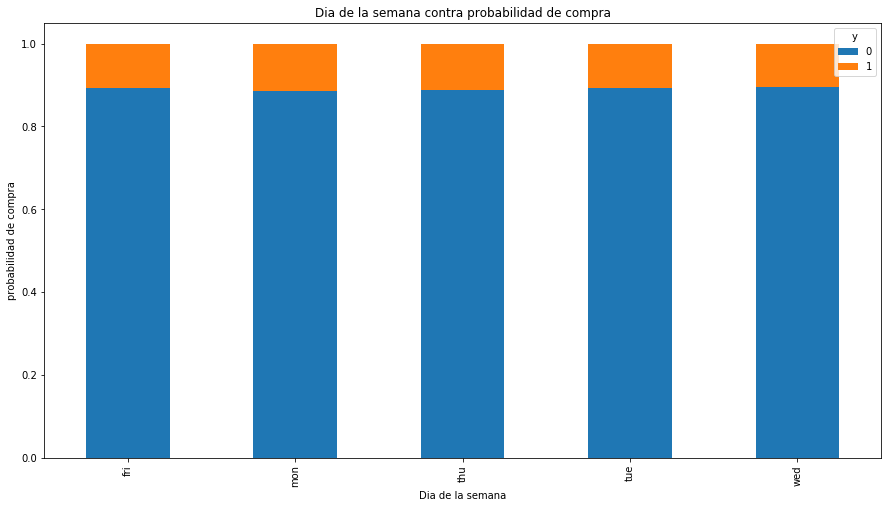

In [17]:
tabla = pd.crosstab(data['day_of_week'],data['y'])
tabla.div(tabla.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Dia de la semana contra probabilidad de compra')
plt.xlabel('Dia de la semana')
plt.ylabel('probabilidad de compra')

Text(0, 0.5, 'probabilidad de compra')

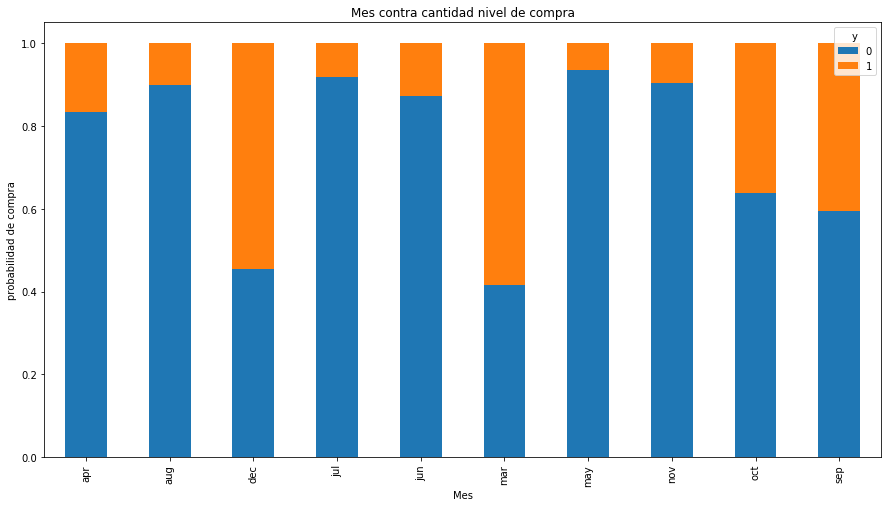

In [18]:
tabla = pd.crosstab(data['month'],data['y'])
tabla.div(tabla.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Mes contra cantidad nivel de compra')
plt.xlabel('Mes')
plt.ylabel('probabilidad de compra')

Text(0, 0.5, 'probabilidad de compra')

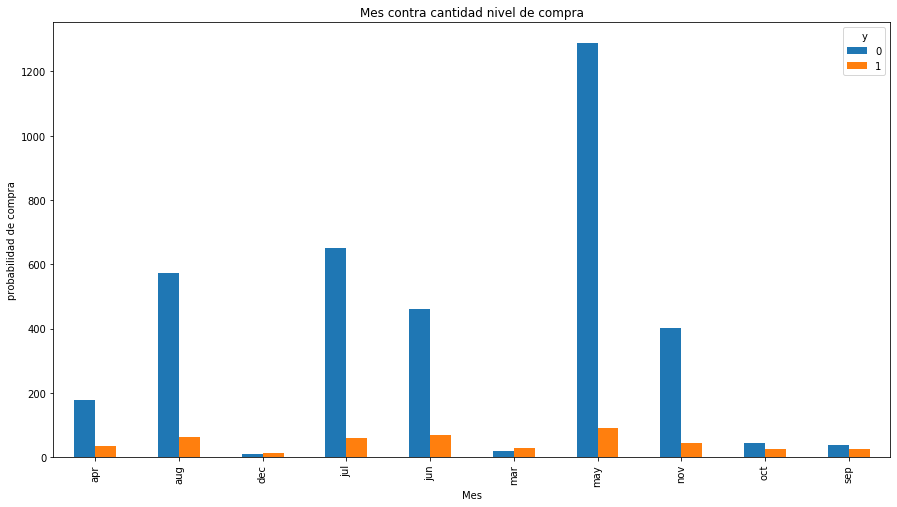

In [19]:
tabla = pd.crosstab(data['month'],data['y'])
tabla.plot(kind='bar')
plt.title('Mes contra cantidad nivel de compra')
plt.xlabel('Mes')
plt.ylabel('probabilidad de compra')

Con estos dos ultimos plot pudimos encontrar informacion realmente muy interesante.
* Existe muchisimos datos en algunos meses -> porque? mas publicidad o mas busqueda de datos
* En mayo se rechazo mucho

Text(0, 0.5, 'Cliente')

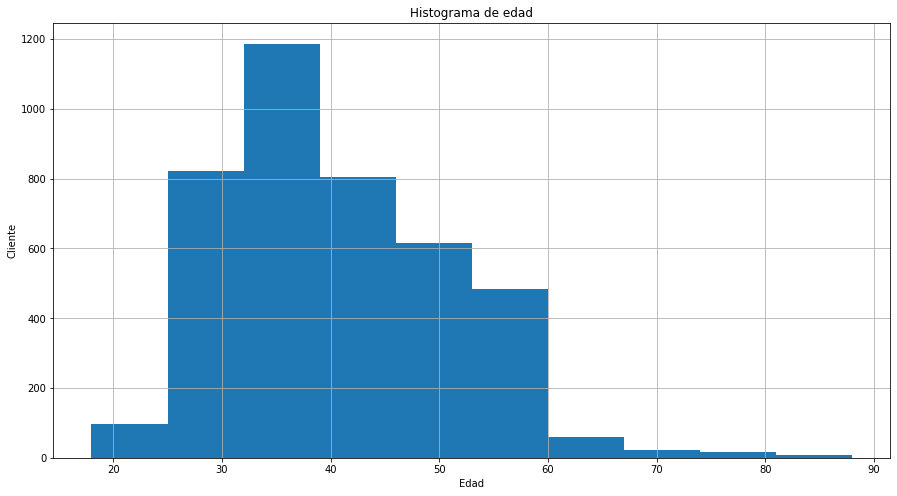

In [20]:
data['age'].hist()
plt.title("Histograma de edad")
plt.xlabel('Edad')
plt.ylabel('Cliente')

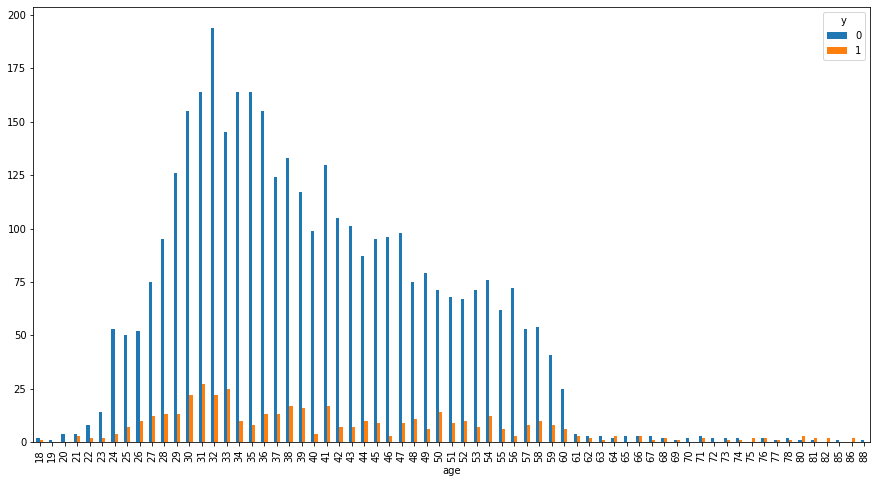

In [21]:
pd.crosstab(data.age,data.y).plot(kind='bar')

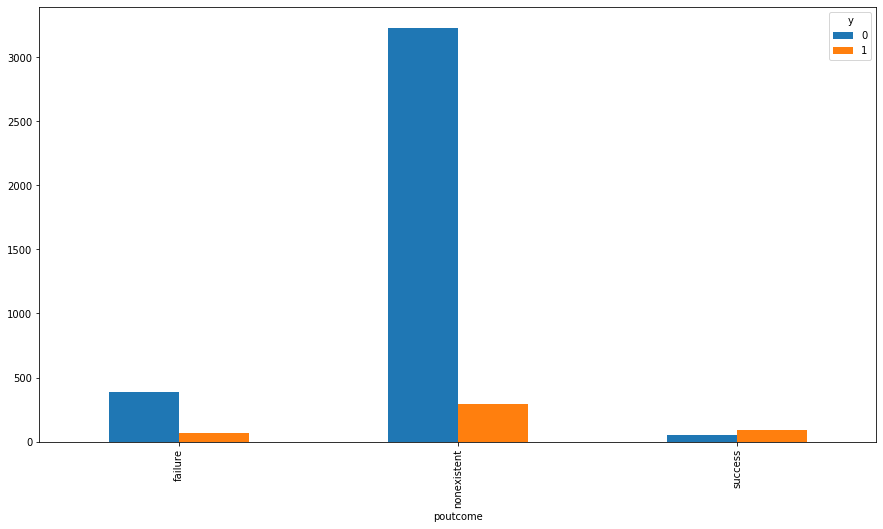

In [22]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')

## Conversion de variables categoricas para analisis

In [23]:
categories = ['job','education','default','marital','housing','loan','month','day_of_week','poutcome','contact']

In [24]:
for c in categories:
    cat_list = 'cat_'+c
    cat_dummies = pd.get_dummies(data[c],prefix=cat_list)
    data = data.join(cat_dummies)

In [25]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cat_job_admin.',
       'cat_job_blue-collar', 'cat_job_entrepreneur', 'cat_job_housemaid',
       'cat_job_management', 'cat_job_retired', 'cat_job_self-employed',
       'cat_job_services', 'cat_job_student', 'cat_job_technician',
       'cat_job_unemployed', 'cat_job_unknown', 'cat_education_Basic',
       'cat_education_High school', 'cat_education_Illiterate',
       'cat_education_Professional Course', 'cat_education_University',
       'cat_education_Unknown', 'cat_default_no', 'cat_default_unknown',
       'cat_default_yes', 'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_housing_no',
       'cat_housing_unknown', 'cat_housing_yes', 'cat_loan_no',
       

In [26]:
data = data.drop(categories,axis=1)
#Eliminamos las columnas que no nos sirven

In [27]:
Y = ['y']
X = [v for v in data.columns.values.tolist() if v not in Y]
X

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'cat_job_admin.',
 'cat_job_blue-collar',
 'cat_job_entrepreneur',
 'cat_job_housemaid',
 'cat_job_management',
 'cat_job_retired',
 'cat_job_self-employed',
 'cat_job_services',
 'cat_job_student',
 'cat_job_technician',
 'cat_job_unemployed',
 'cat_job_unknown',
 'cat_education_Basic',
 'cat_education_High school',
 'cat_education_Illiterate',
 'cat_education_Professional Course',
 'cat_education_University',
 'cat_education_Unknown',
 'cat_default_no',
 'cat_default_unknown',
 'cat_default_yes',
 'cat_marital_divorced',
 'cat_marital_married',
 'cat_marital_single',
 'cat_marital_unknown',
 'cat_housing_no',
 'cat_housing_unknown',
 'cat_housing_yes',
 'cat_loan_no',
 'cat_loan_unknown',
 'cat_loan_yes',
 'cat_month_apr',
 'cat_month_aug',
 'cat_month_dec',
 'cat_month_jul',
 'cat_month_jun',
 'cat_month_mar',
 'cat_month_may',
 'cat_month_nov

## Seleccion de rasgos para el modelo

In [28]:
n = 12

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.linear_model as slm

In [30]:
lr = slm.LogisticRegression(solver='lbfgs')

In [31]:
#data[X] = data[X].replace([0,1],[False,True])

In [32]:
rfe = RFE(lr,n)
rfe = rfe.fit(data[X],data[Y].values.ravel())

/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [33]:
z = zip(data.columns.values.tolist(),rfe.ranking_,rfe.support_)
list(z)

[('age', 32, False),
 ('duration', 44, False),
 ('campaign', 20, False),
 ('pdays', 46, False),
 ('previous', 1, True),
 ('emp.var.rate', 19, False),
 ('cons.price.idx', 27, False),
 ('cons.conf.idx', 24, False),
 ('euribor3m', 1, True),
 ('nr.employed', 39, False),
 ('y', 2, False),
 ('cat_job_admin.', 14, False),
 ('cat_job_blue-collar', 12, False),
 ('cat_job_entrepreneur', 42, False),
 ('cat_job_housemaid', 13, False),
 ('cat_job_management', 1, True),
 ('cat_job_retired', 9, False),
 ('cat_job_self-employed', 34, False),
 ('cat_job_services', 3, False),
 ('cat_job_student', 1, True),
 ('cat_job_technician', 1, True),
 ('cat_job_unemployed', 47, False),
 ('cat_job_unknown', 26, False),
 ('cat_education_Basic', 15, False),
 ('cat_education_High school', 48, False),
 ('cat_education_Illiterate', 21, False),
 ('cat_education_Professional Course', 31, False),
 ('cat_education_University', 7, False),
 ('cat_education_Unknown', 35, False),
 ('cat_default_no', 28, False),
 ('cat_default_u

In [34]:
cols = ['cat_poutcome_nonexistent','cat_day_of_week_wed','cat_month_nov','cat_month_mar',
        'cat_month_jun','cat_month_jul','cat_month_dec','cat_month_aug','cat_job_retired','cat_job_blue-collar',
        'euribor3m','previous']

In [35]:
X = data[cols]
Y = data['y']

In [36]:
X.describe()

,cat_poutcome_nonexistent,cat_day_of_week_wed,cat_month_nov,cat_month_mar,cat_month_jun,cat_month_jul,cat_month_dec,cat_month_aug,cat_job_retired,cat_job_blue-collar,euribor3m,previous
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,0.855305,0.193008,0.108279,0.011653,0.128672,0.172615,0.005341,0.154406,0.040301,0.214615,3.621356,0.190337
std,0.351836,0.394707,0.310770,0.107333,0.334877,0.377960,0.072896,0.361382,0.196688,0.410605,1.733591,0.541788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.635000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.334000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.857000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.961000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.045000,6.000000


### Implementacion del Modelo en Python con statsmodel.api

In [37]:
import statsmodels.api as sm

In [38]:
log_model = sm.Logit(Y,X)

In [39]:
result = log_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/home/santiago/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/santiago/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [40]:
result.summary2()

/home/santiago/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/santiago/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit                Pseudo R-squared:     inf   
Dependent Variable:     y                    AIC:                  inf   
Date:                   2020-03-17 14:12     BIC:                  inf   
No. Observations:       4119                 Log-Likelihood:       -inf  
Df Model:               11                   LL-Null:              0.0000
Df Residuals:           4107                 LLR p-value:          1.0000
Converged:              1.0000               Scale:                1.0000
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
cat_poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
cat_day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
cat_month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
cat_month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
cat_month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
cat_month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
cat_month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
cat_month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
cat_job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
cat_job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
euribor3m                -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
previous                 -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
=========================================================================

"""

## Implementacion del modelo en Python con sckit-learn

In [41]:
from sklearn import linear_model

In [42]:
logit_model = linear_model.LogisticRegression(solver='lbfgs')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logit_model.score(X,Y)
#Probabilidad de que el modelo funcione

0.8958485069191552

In [44]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))
#Por cada unidad del lado derecho aumenta las probabilidades en un punto recomendable

,0,1
0,cat_poutcome_nonexistent,[0.35494520625409687]
1,cat_day_of_week_wed,[0.04611312725984843]
2,cat_month_nov,[0.4577084191062172]
3,cat_month_mar,[1.6386680234596918]
4,cat_month_jun,[1.0566897056472375]
5,cat_month_jul,[0.9630554140670987]
6,cat_month_dec,[1.1943974572122935]
7,cat_month_aug,[0.6292588895075709]
8,cat_job_retired,[0.36165159081098963]
9,cat_job_blue-collar,[-0.35331387435003936]


### Validacion del modelo logistico

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size= 0.3,random_state=0)

In [47]:
lm = linear_model.LogisticRegression(solver='liblinear')

In [48]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [50]:
probs = lm.predict_proba(x_test)
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044408, 0.34955592],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [51]:
predict = lm.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [52]:
display(Math(r'\varepsilon\in(0,1), Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [53]:
prob = probs[:,1]
prob_df = pd.DataFrame()
prob_df["prob"] = prob
threshold = 0.1
prob_df['prediction'] = np.where(prob_df["prob"]>threshold, 1 , 0)

In [54]:
prob_df.head()

,prob,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [55]:
print("cantidad de elementos predictos: ",prob_df['prediction'].count())
print("Posibles casos: ",prob_df['prediction'].sum())
pd.crosstab(prob_df.prediction, columns='count')

cantidad de elementos predictos:  1236
Posibles casos:  390


col_0,count
prediction,
0,846
1,390


In [56]:
390/len(prob_df)*100
#eficacia del modelo

31.55339805825243

In [57]:
from sklearn import metrics

El siguiente valor representa el porcentaje de acierto que tiene nuestro modelo contra los valores reales

In [58]:
metrics.accuracy_score(y_test,predict)

0.9004854368932039

## Validacion 

### Validacion crusada - Cross Validation
Consiste basicamente en generar `K` particiones de los datos y luego realizar una validacion con cada uno de esos datos, con cada uno de estos modelos vamos a tener una medida de error que nos va a servir para calcular la `media` de todos estos errores.
### Random Cross Validation
Consiste en elegir `aleatoriamente` los datos de testing. El problema de esto es que los conjunto de elementos de testing y traning se pueden solapar en cada proceso.

### Leave one out Cross Validation
Consiste en hacer `n` validaciones, siendo n el largo de conjunto de elementos que estamos trabajando. En cada traning se excluye solo un elemento que va a ser el testing. 

Se realiza esto con todos los elementos que se esta trabajando. La ventaja es su nivel muy bajo de error. sin embargo, es muy costoso a nivel computacional.


## Objetivo
Encontrar el numero mas obtimo y evitar overfitting.

In [59]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import LeaveOneOut

In [60]:
# tipo de modelo, dataset X, dataset y, que buscamos, cantidad de veces a hacer
scores = cross_val_score(linear_model.LogisticRegression(solver='lbfgs'), X, Y, scoring="accuracy",cv=10)

In [61]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [62]:
scores.mean()

0.8943903101599225

# Matrices de Confusion

Una curva ROC es una herramienta grafica que nos sirve para entender el funcionamiento y eficacia de clasificacion que tiene un modelo.

En caso de una regresion logistica basicamente dice si una prediccion es correcta o incorrecta.
Basicamente una matriz 2X2 donde dice el resultado de la prediccion contra el resultado real.
* Positivo ~ Positivo : Correcto - Verdadero Positivo --> TN
* Negativo ~ Negativo : Correcto - Verdadero Negativo --> TP
* Positivo ~ Negativo : Error - Falso Positovo --> FP
* Negativo ~ Positivo : Error - Falso Negativo --> FN

En base de esto se puede calcular el error. 
* Sensibilidad : TN/(TP+FN)
* Especifidad: TN/(TN+FP)

### `Curvas ROC`
Caracteristicas operativas del receptor.

La curva roc representa Especifidad vs Sensibilidad busca entender mejor el modelo. Representan:
* Cuanto mejor se ajusta la curva al borde superior izquierdo, mejor es la prediccion del modelo.
* Cuanto mas cerca se encuentre de la diagonal, pero es el modelo.
* Cuanto mayor sea el area abajo de la curva, mejor sera la prediccion.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [64]:
lm = linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
probs = lm.predict_proba(x_test)

In [81]:
prob = probs[:,1]
prob_df = pd.DataFrame({'probs':prob})

In [118]:
threshold = 0.1
prob_df['prediction'] = np.where(prob_df['probs']>= threshold,1,0)
prob_df['actual'] = list(y_test)
prob_df

,probs,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0
...,...,...,...
1231,0.062222,0,0
1232,0.062157,0,0
1233,0.349016,1,0
1234,0.026190,0,0


In [119]:
confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


Aca podemos ver los falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos.

In [120]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [121]:
sensibilidad = TP/(FN+TP)
sensibilidad #porcentual

0.6721311475409836

In [122]:
especifidad = 1 - (TN/(TN+FP))
especifidad

0.2764811490125674

In [123]:
thredholds = np.arange(0.04, 0.3 , 0.01)

In [124]:
sensi = [1]
espe = [1]
for t in thredholds:
    prob_df['prediction'] = np.where(prob_df['probs']>= t,1,0)
    confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    
    sensibilidad = TP/(FN+TP)
    sensi.append(sensibilidad)
    especifidad = 1 - (TN/(TN+FP))
    espe.append(especifidad)
    
sensi.append(0)
espe.append(0)

Text(0.5, 1.0, 'Curva ROC')

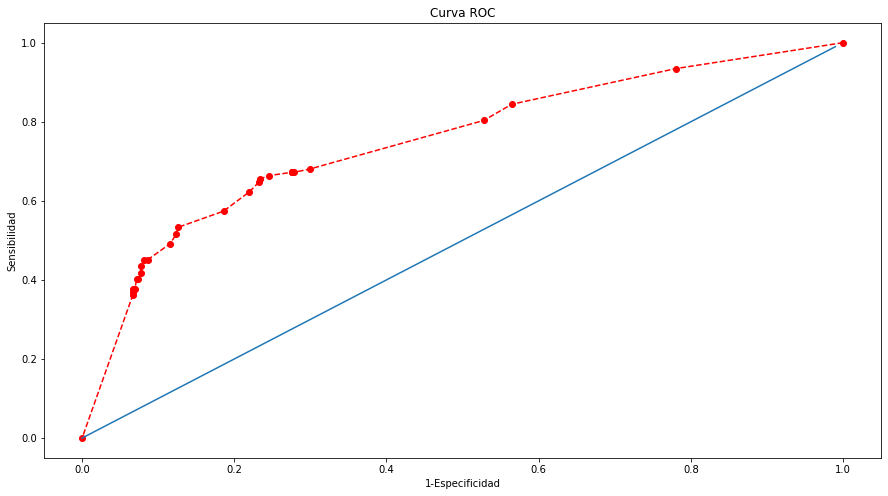

In [125]:
plt.plot(espe,sensi,marker="o", linestyle="--",color='r')
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel('Sensibilidad')
plt.title("Curva ROC")

* Si tenemos una corva ROC por debajo de la curva, quiere decir que tenemos un modelo peor que tirar una moneda al aire.
* La recta del medio es probabilidad 50 50
* Mientras mas lejos esta de la curva del medio mejor se ajusta el sistema
* El mejor de los casos es 0 en especificidad y 1 en Sensibilidad

Esto mismo se puede calcular gracias a Sklearn

In [128]:
from sklearn import metrics

In [129]:
esp1, sensit, _ = metrics.roc_curve(y_test,prob)

In [131]:
df = pd.DataFrame({
    "x":esp1,
    "y":sensit
})

Text(0.5, 1.0, 'Curva ROC')

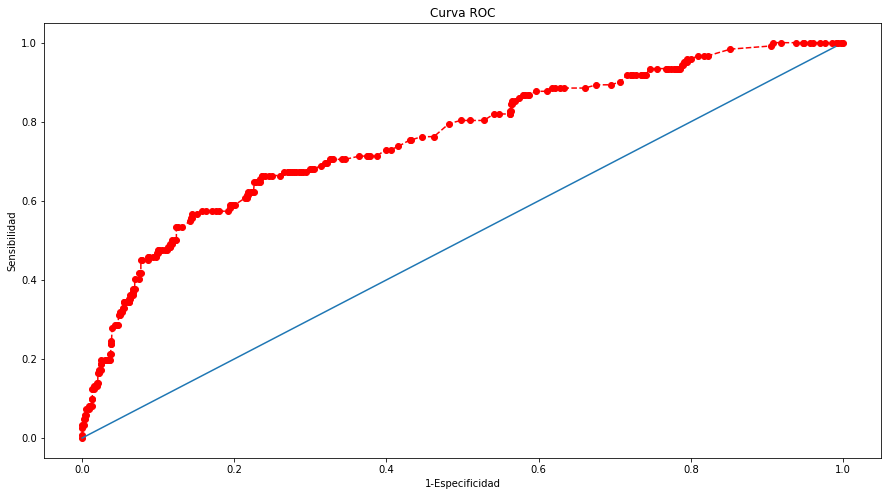

In [134]:
plt.plot(df.x,df.y,marker="o", linestyle="--",color='r')
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel('Sensibilidad')
plt.title("Curva ROC")

In [135]:
auc = metrics.auc(df.x,df.y)
auc

0.7579171204049798

# Resumen Final
* La regresion linealno sirve para predecir variables binarias, ya que el rango es de numeros reales. (-inf a +inf)
* La regresion logistica predice exito o fracaso. La probabilidad de que ocurriria el suceso.
* La regresion logistica posee un modelo.
* Para estimar los coeficientes utilizamos maxima verosimilidad y el algoritmos de Newton Rapbson.
* El contraste de hipotesis de cada p-valor, cuanto mas pequenio es mas significativilidad tiene para el modelo.
* Se puede validar el modelo con la tecnica de k-fold CV
* Marcar el umbral de desicion del modelo afecta a su eficiencia y sensibilidad.
* La eficacia del modelo se mide con una curva de ROC.